In [1]:
from tsne_umap_diagnostics.tsne_diagnostics import get_P_heatmap, get_Q_heatmap, calculate_P_matrix, calculate_Q_matrix
from tsne_umap_diagnostics.umap_diagnostics import get_V_heatmap, get_W_heatmap, calculate_V_matrix, calculate_W_matrix
from tsne_umap_diagnostics.general_diagnostics import distance_fit_plot, matrix_fit_plot_from_matrices, matrix_fit_plot, diagnostic_plots, plot_individual_cost, plot_outlier_score

In [2]:
import sklearn.datasets as datasets
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import numpy as np

# Table of Contents
* [Diagnostic plots on the Iris dataset](#diagnostic-plots-on-the-iris-dataset)
    * [t-SNE](#t-sne)
    * [UMAP](#umap)
* [Individual cost on the Circle dataset](#individual-cost-on-the-circle-dataset)
* [Outlier detection on a dataset with 3 clusters and an outlier](#outlier-detection-on-a-dataset-with-3-clusters-and-an-outlier)
* [Diagnostics for 5D Uniform and 2D-in-5D Uniform datasets](#diagnostics-for-5d-uniform-and-2d-in-5d-uniform-datasets)
* [MNIST](#mnist)

(warning: links might not work in some IDE's)


# Diagnostic plots on the Iris dataset

In [3]:
iris = datasets.load_iris()

## t-SNE

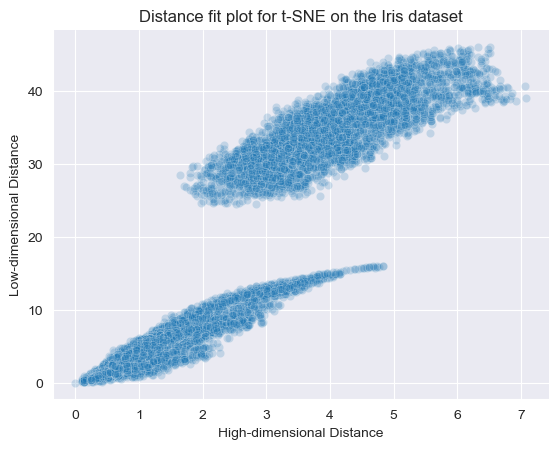

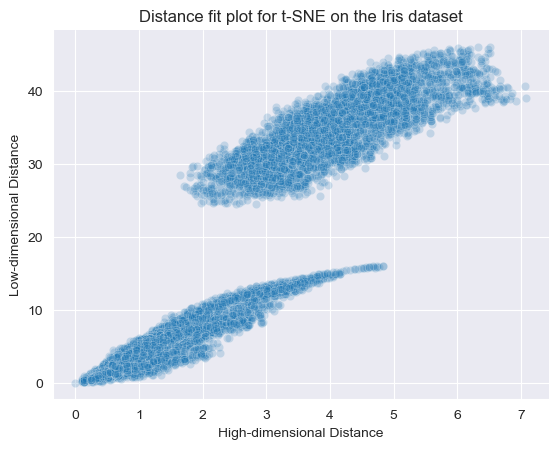

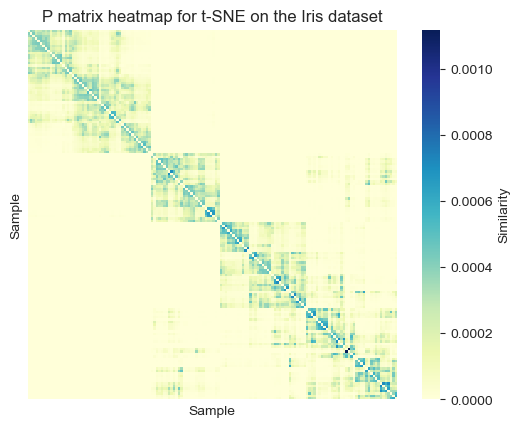

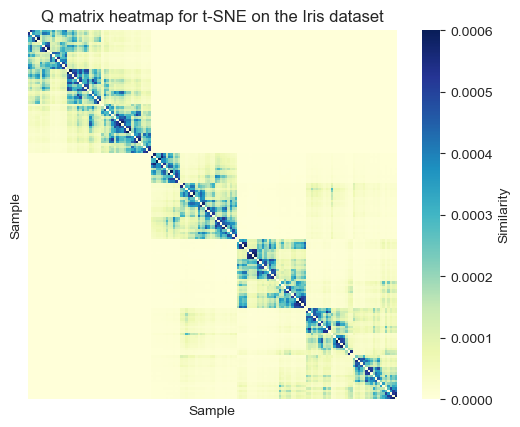

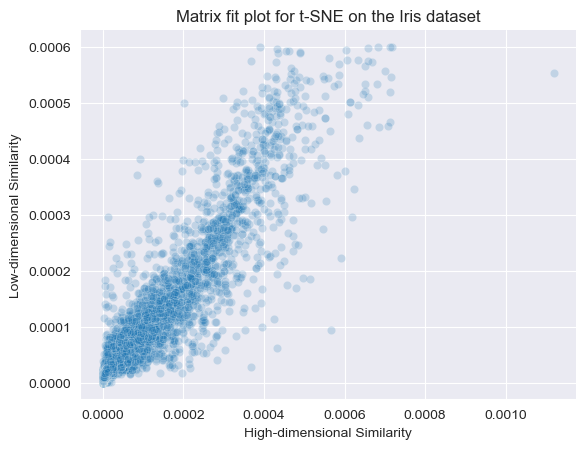

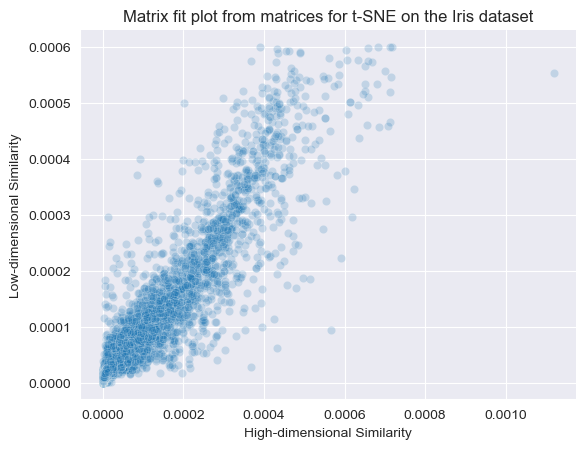

C:\Users\Sendit\AppData\Local\Temp\ipykernel_15672\3374307312.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


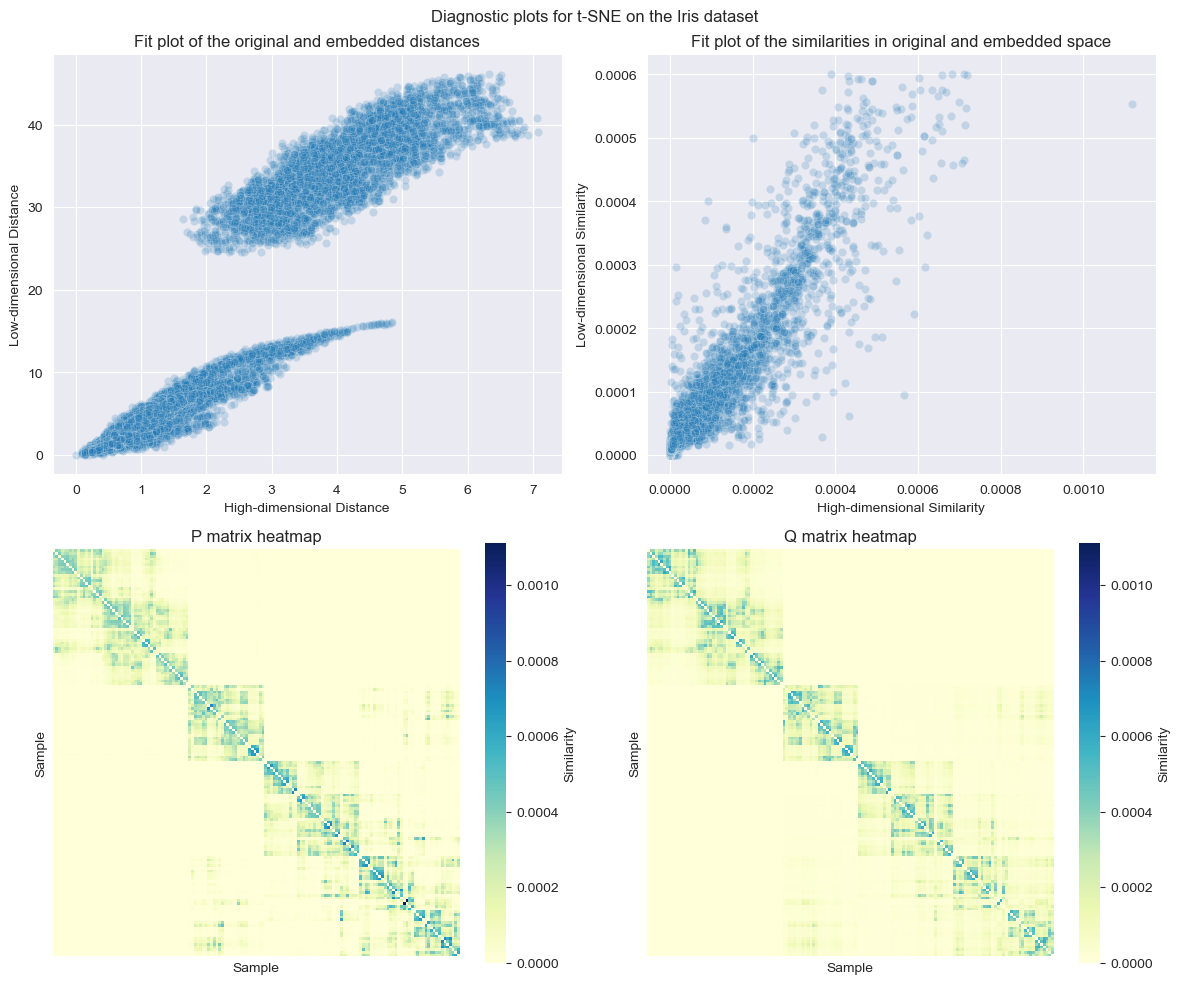

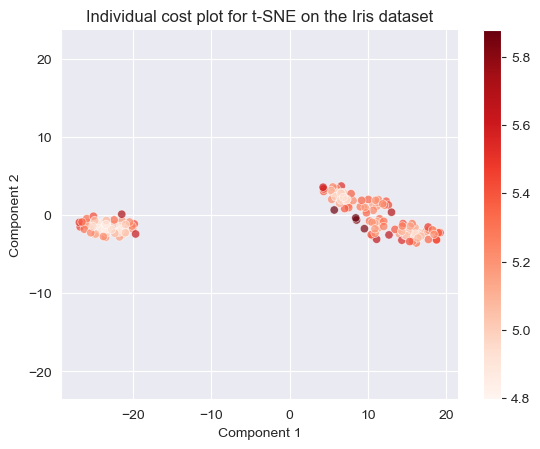

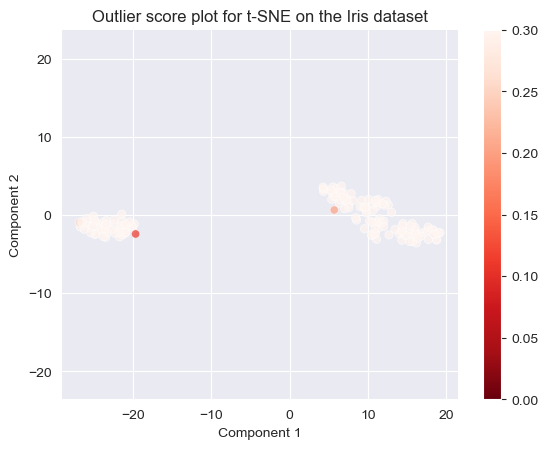

In [4]:
iris_embedding_tsne = TSNE(perplexity=30).fit_transform(iris.data)

# Distance fit plot
fig = distance_fit_plot(X_original=iris.data, X_embedded=iris_embedding_tsne, title='Distance fit plot for t-SNE on the Iris dataset')
#plt.savefig("tsne_distance_fit")
plt.show()

# Distance fit plot for different distance metrics
hd_dist = metrics.pairwise_distances(iris.data, metric='euclidean')
ld_dist = metrics.pairwise_distances(iris_embedding_tsne, metric='euclidean')
fig = distance_fit_plot(distances_original=hd_dist, distances_embedded=ld_dist, title='Distance fit plot for t-SNE on the Iris dataset')
plt.show()

# P matrix heatmap
fig = get_P_heatmap(X_original=iris.data, perplexity=30, title='P matrix heatmap for t-SNE on the Iris dataset')
plt.show()

# Q matrix heatmap
fig = get_Q_heatmap(X_embedded=iris_embedding_tsne, title='Q matrix heatmap for t-SNE on the Iris dataset')
plt.show()

# Matrix fit plot
fig = matrix_fit_plot(X_original=iris.data, X_embedded=iris_embedding_tsne, method='tsne', perplexity=30, title='Matrix fit plot for t-SNE on the Iris dataset')
plt.show()

# Computing similarity matrices and the fit plot
P = calculate_P_matrix(X_original=iris.data) # Can also be asymmetric if asymmetric=True
Q = calculate_Q_matrix(X_embedded=iris_embedding_tsne)
fig = matrix_fit_plot_from_matrices(P, Q, title='Matrix fit plot from matrices for t-SNE on the Iris dataset')
plt.show()

# Above plots combined
fig, axs = diagnostic_plots(X_original=iris.data, X_embedded=iris_embedding_tsne, method='tsne', perplexity=30, title='Diagnostic plots for t-SNE on the Iris dataset')
#plt.savefig("diagnostic_plots_tsne")
fig.show()

# Individual cost
fig = plot_individual_cost(X_original=iris.data, X_embedded=iris_embedding_tsne, method='tsne', perplexity=30, title='Individual cost plot for t-SNE on the Iris dataset')
plt.show()

# Outlier score
fig = plot_outlier_score(X_original=iris.data, X_embedded=iris_embedding_tsne, method='tsne', perplexity=30, title='Outlier score plot for t-SNE on the Iris dataset')
plt.show()


## UMAP

C:\Users\Sendit\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


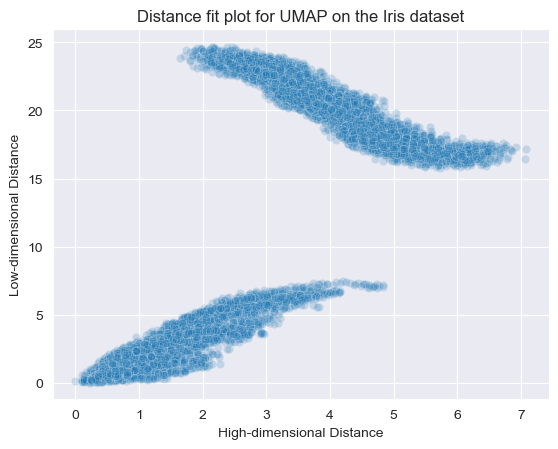

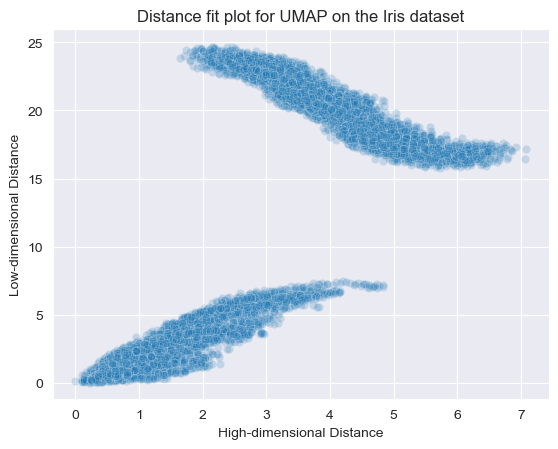

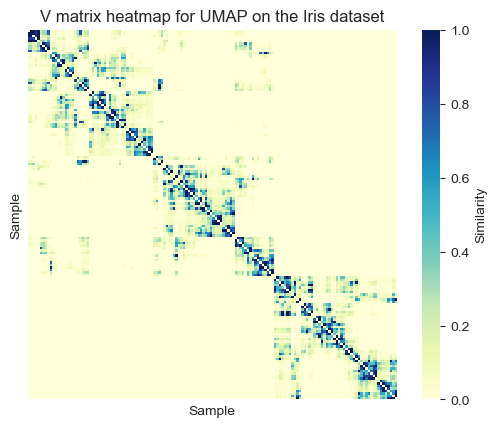

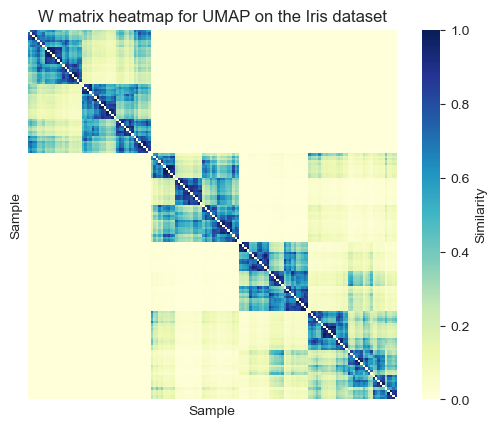

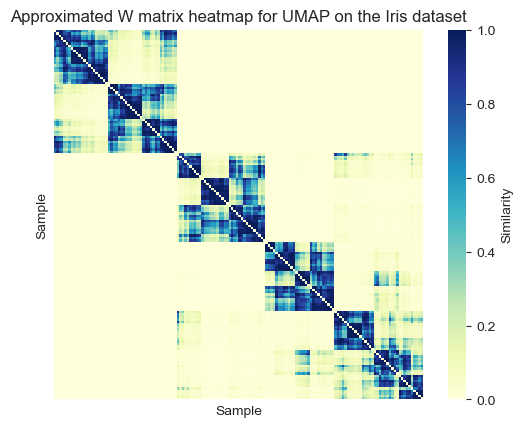

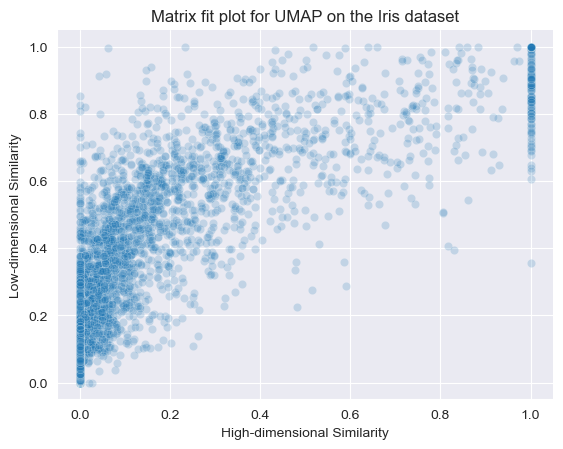

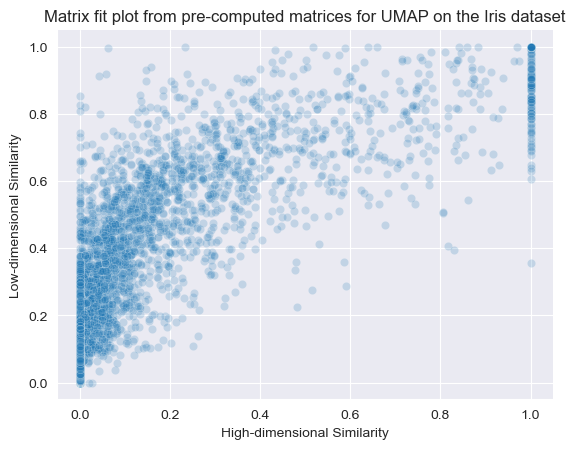

C:\Users\Sendit\AppData\Local\Temp\ipykernel_15672\882041452.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


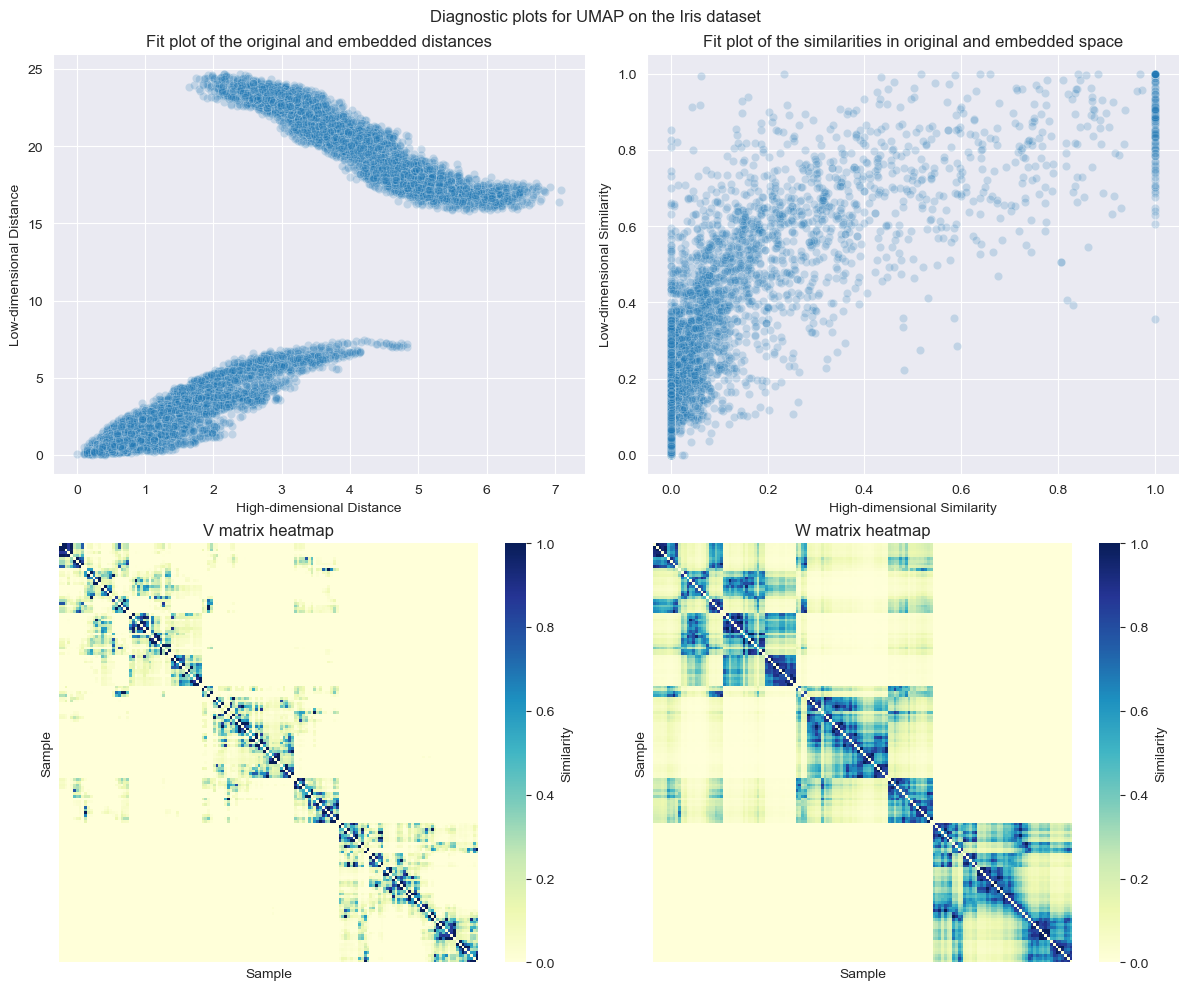

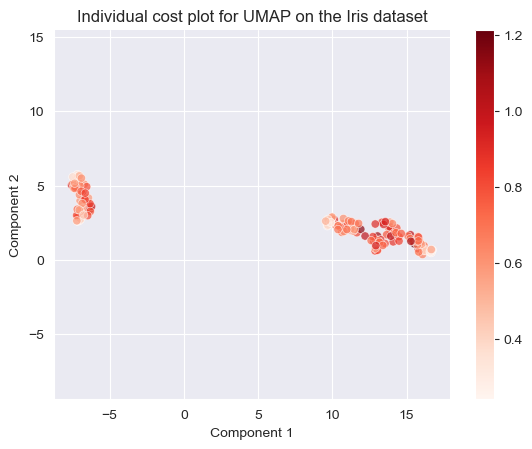

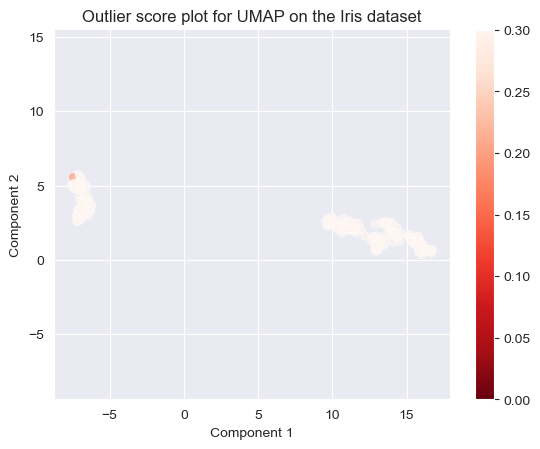

In [5]:
model = umap.UMAP(n_neighbors=30)
iris_embedding_umap = model.fit_transform(iris.data)

# Distance fit plot
fig = distance_fit_plot(X_original=iris.data, X_embedded=iris_embedding_umap, title='Distance fit plot for UMAP on the Iris dataset')
#plt.savefig("umap_distance_fit")
plt.show()

# Distance fit plot for different distance metrics
hd_dist = metrics.pairwise_distances(iris.data, metric='euclidean')
ld_dist = metrics.pairwise_distances(iris_embedding_umap, metric='euclidean')
fig = distance_fit_plot(distances_original=hd_dist, distances_embedded=ld_dist, title='Distance fit plot for UMAP on the Iris dataset')
plt.show()

# V matrix heatmap
fig = get_V_heatmap(X_original=iris.data, k_neighbours=30, title='V matrix heatmap for UMAP on the Iris dataset')
plt.show()

# W matrix heatmap
fig = get_W_heatmap(X_embedded=iris_embedding_umap, title='W matrix heatmap for UMAP on the Iris dataset')
plt.show()

# Approximated W matrix heatmap
fig = get_W_heatmap(X_embedded=iris_embedding_umap, use_approximation=True, title='Approximated W matrix heatmap for UMAP on the Iris dataset')
plt.show()

# Matrix fit plot
fig = matrix_fit_plot(X_original=iris.data, X_embedded=iris_embedding_umap, method='umap', k_neighbours=30, title='Matrix fit plot for UMAP on the Iris dataset')
plt.show()

# Computing similarity matrices and the fit plot
V = calculate_V_matrix(X_original=iris.data, k_neighbours=30) # Can also be asymmetric if asymmetric=True
W = calculate_W_matrix(X_embedded=iris_embedding_umap) # Can also be approximated if use_approximation=True
fig = matrix_fit_plot_from_matrices(V, W, title='Matrix fit plot from pre-computed matrices for UMAP on the Iris dataset')
plt.show()

# Above plots combined
fig, axs = diagnostic_plots(X_original=iris.data, X_embedded=iris_embedding_umap, method='umap', k_neighbours=30, title='Diagnostic plots for UMAP on the Iris dataset')
#plt.savefig("diagnostic_plots_umap")
fig.show()

# Individual cost
fig = plot_individual_cost(X_original=iris.data, X_embedded=iris_embedding_umap, method='umap', k_neighbours=30, title='Individual cost plot for UMAP on the Iris dataset')
plt.show()

# Outlier score
fig = plot_outlier_score(X_original=iris.data, X_embedded=iris_embedding_umap, method='umap', k_neighbours=30, title='Outlier score plot for UMAP on the Iris dataset')


# Individual cost on the Circle dataset

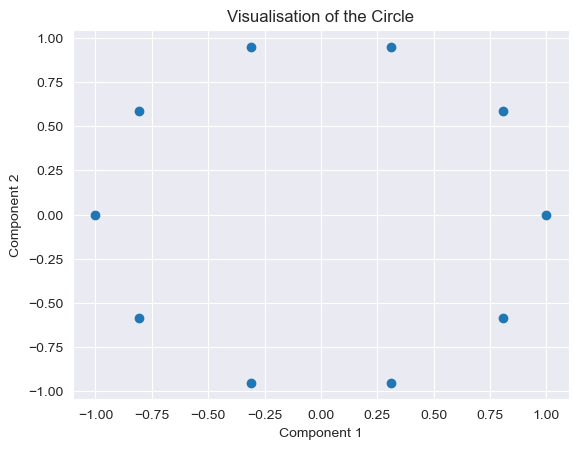

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 0.694065
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.452966
[t-SNE] KL divergence after 1000 iterations: 0.444112


C:\Users\Sendit\AppData\Local\Temp\ipykernel_15672\2556804505.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Sendit\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Sendit\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Sendit\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


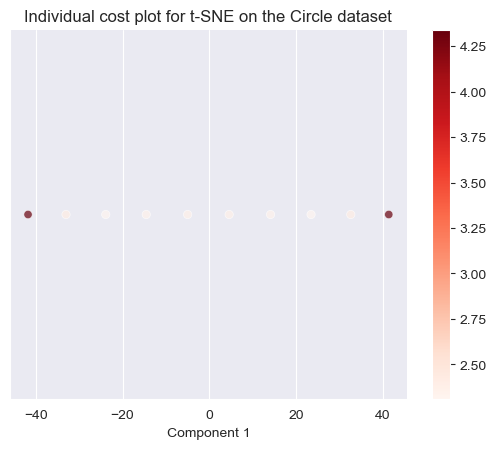

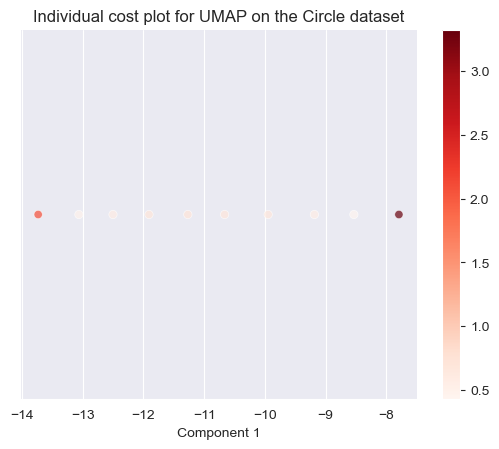

In [6]:
# 2D circle
r = 1
n = 10
A = np.arange(0, 2*np.pi, step=2*np.pi/n)
circle = np.column_stack((np.cos(A), np.sin(A)))

plt.scatter(circle[:,0], circle[:,1])
plt.title('Visualisation of the Circle')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# t-SNE
circle_tsne = TSNE(
        n_components=1,
        perplexity=3,
        verbose=1,
        random_state=42,
        early_exaggeration=1,
        init="pca",
        #init="random",
        learning_rate=0.5,
    ).fit_transform(circle)

fig = plot_individual_cost(X_original=circle, X_embedded=circle_tsne, method='tsne', perplexity=3, title='Individual cost plot for t-SNE on the Circle dataset')
fig.show()

# UMAP
circle_umap = umap.UMAP(n_components=1, n_neighbors=30, random_state=7).fit_transform(circle)
fig = plot_individual_cost(X_original=circle, X_embedded=circle_umap, method='umap', k_neighbours=3, title='Individual cost plot for UMAP on the Circle dataset')
plt.show()


# Outlier detection on a dataset with 3 clusters and an outlier

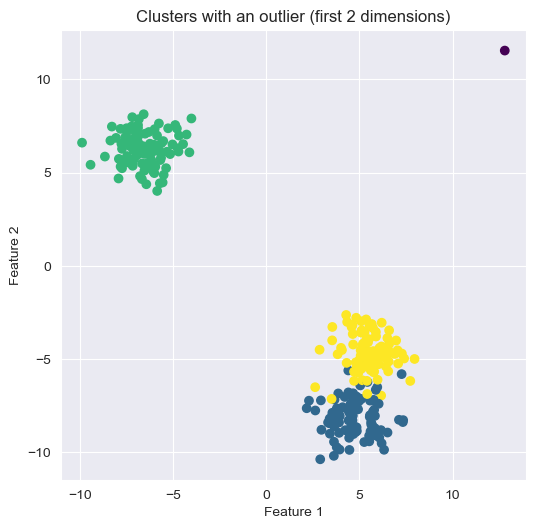

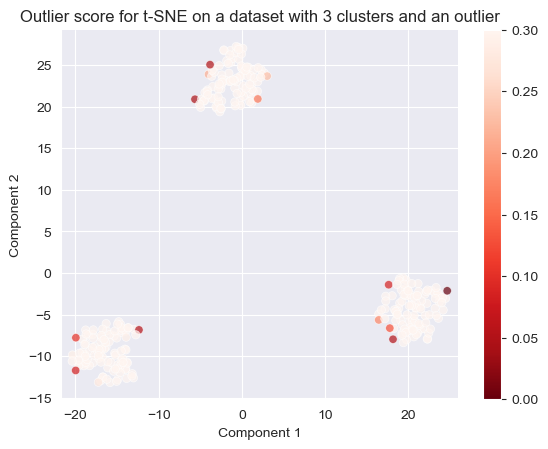

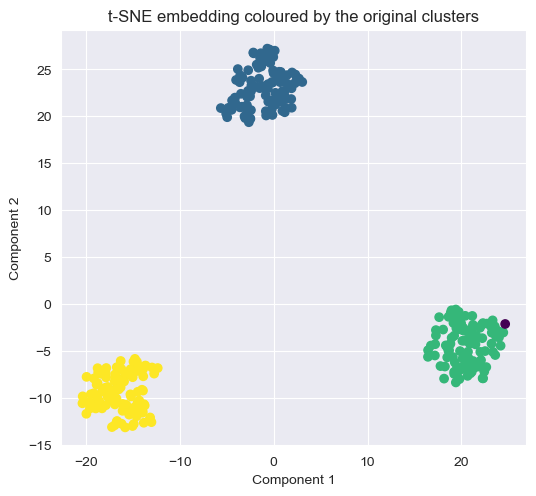

C:\Users\Sendit\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


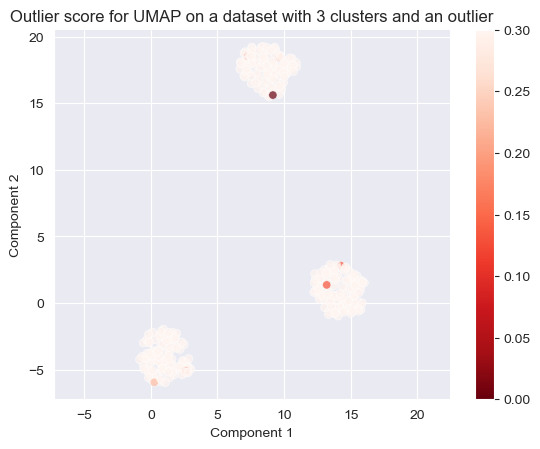

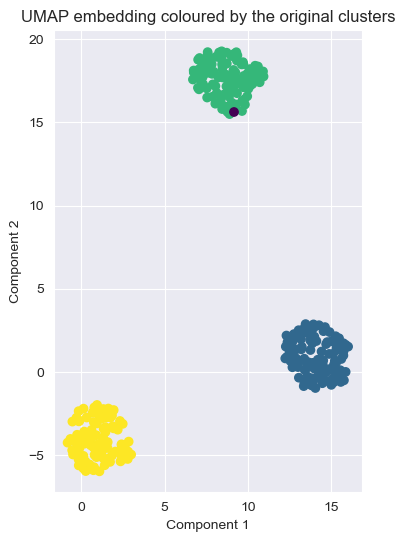

In [7]:
# Generate 3 clusters, 3 features, and 300 total points
X, y = datasets.make_blobs(n_samples=300, centers=3, n_features=3, cluster_std=1.0)

# Generate 1 outlier far from the clusters
outliers = np.random.uniform(low=10, high=15, size=(1, 3))

# Combine clusters and outliers
X_combined = np.vstack([X, outliers])
y_combined = np.append(y, [-1])  # Label outliers as -1

# Visualize first 2 dimensions
plt.figure(figsize=(6, 6))
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, cmap='viridis', marker='o')
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Clusters with an outlier (first 2 dimensions)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.savefig("first_2_dimensions")
plt.show()

# t-SNE
X_embedding = TSNE(perplexity=40, random_state=42).fit_transform(X_combined)

fig = plot_outlier_score(X_original=X_combined, X_embedded=X_embedding, method='tsne', perplexity=40, title='Outlier score for t-SNE on a dataset with 3 clusters and an outlier')
plt.show()

# Label embedding according to original clusters
plt.figure(figsize=(6, 6))
plt.scatter(X_embedding[:, 0], X_embedding[:, 1], c=y_combined, cmap='viridis', marker='o')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("t-SNE embedding coloured by the original clusters")
#plt.savefig("tsne_embedding_coloured_by_original_clusters")
plt.show()

# UMAP
X_embed_umap = umap.UMAP(n_neighbors=40, min_dist=0.5).fit_transform(X_combined)

fig = plot_outlier_score(X_original=X_combined, X_embedded=X_embed_umap, method='umap', k_neighbours=40, title='Outlier score for UMAP on a dataset with 3 clusters and an outlier')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_embed_umap[:, 0], X_embed_umap[:, 1], c=y_combined, cmap='viridis', marker='o')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("UMAP embedding coloured by the original clusters")
#plt.savefig("umap_embedding_coloured_by_original_clusters")
plt.show()


# Diagnostics for 5D Uniform and 2D-in-5D Uniform datasets

C:\Users\Sendit\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


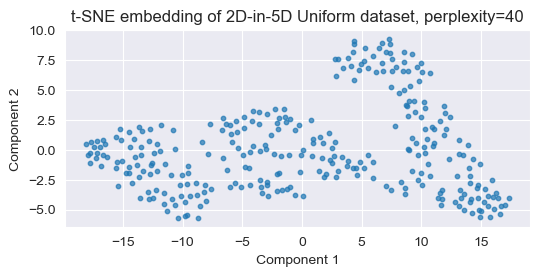

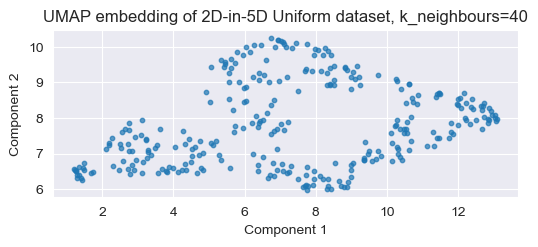

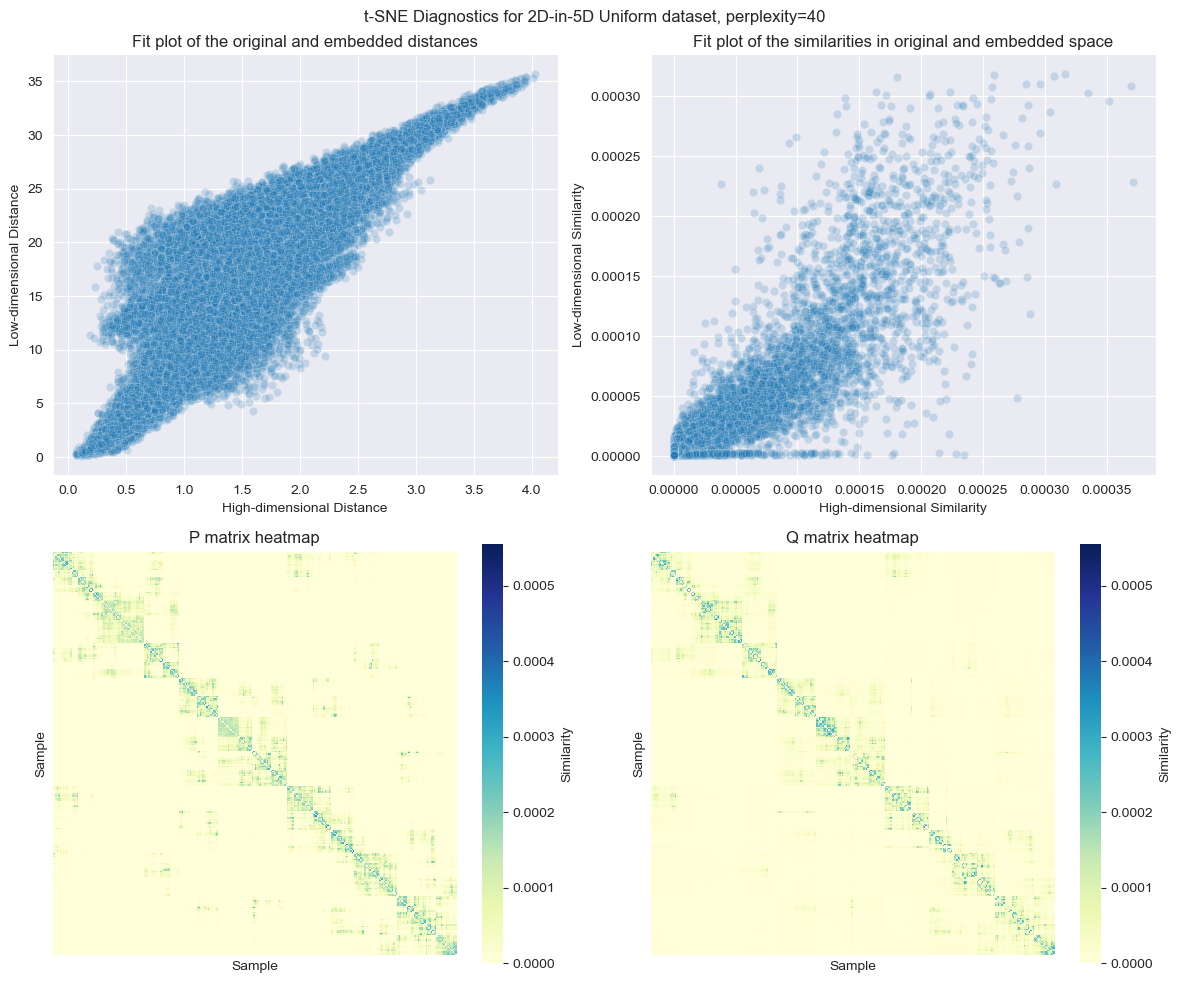

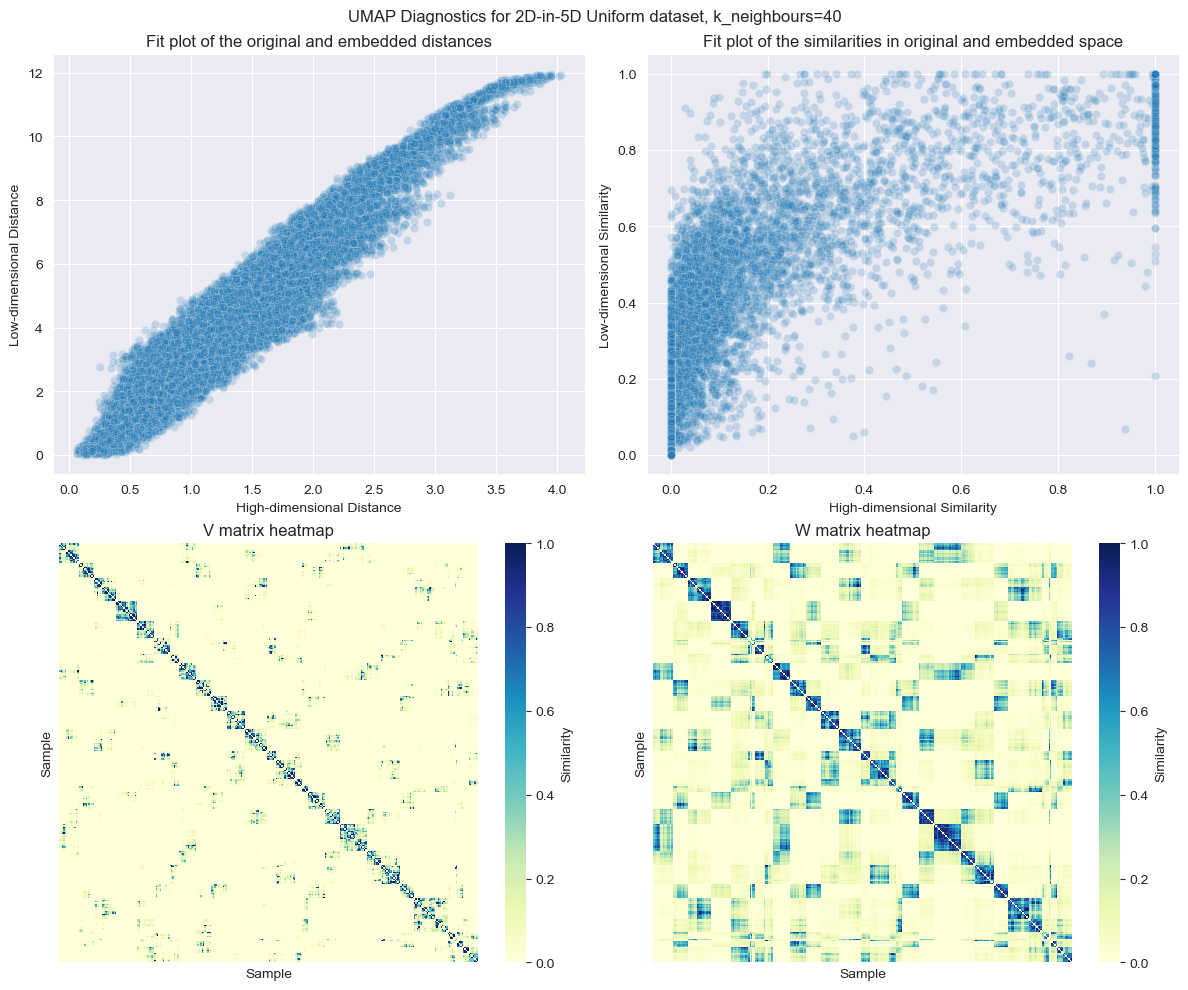

In [8]:
# perplexity and k_neighbours
k = 40
# Choose the dataset
#dataset = '5D Uniform'
dataset = '2D-in-5D Uniform'

if dataset == '5D Uniform':
    # A dataset with 300 data points, 5 dimensions, uniformly distributed
    X = np.random.uniform(low=0.0, high=1.0, size=(300, 5))
else:
    # A dataset with 300 datapoints uniformly distributed on a noisy 2d plane in 5d space
    base_data = np.random.uniform(low=0, high=1, size=(300, 2))
    projection_matrix = np.array([[ 1.91210151,  0.32853539,  0.83872926,  0.39001134, -1.30929218],
                                  [ 0.65042652, -1.404722  ,  0.84922357,  0.87307734, -1.17594252]])
    X = base_data @ projection_matrix  # shape (300, 5)
    # Add small noise
    X += np.random.normal(0, 0.1, size=X.shape)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=k)
X_tsne = tsne.fit_transform(X)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=k)
X_umap = umap_model.fit_transform(X)

# Plot t-SNE
plt.figure(figsize=(6, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.7)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"t-SNE embedding of {dataset} dataset, perplexity={k}")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
#plt.savefig(f"tsne_{dataset}_perplexity{k}")
plt.show()

# Plot UMAP
plt.figure(figsize=(6, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10, alpha=0.7)
plt.title(f"UMAP embedding of {dataset} dataset, k_neighbours={k}")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
#plt.savefig(f"umap_{dataset}_kneighbours{k}")
plt.show()

fig = diagnostic_plots(X_original=X, X_embedded=X_tsne, method='tsne', perplexity=k, title=f't-SNE Diagnostics for {dataset} dataset, perplexity={k}')
#plt.savefig(f'tsne_diagnostics_{dataset}_perplexity{k}')
plt.show()

fig = diagnostic_plots(X_original=X, X_embedded=X_umap, method='umap', k_neighbours=k, title=f'UMAP Diagnostics for {dataset} dataset, k_neighbours={k}')
#plt.savefig(f'umap_diagnostics_{dataset}_kneighbours{k}')
plt.show()

# MNIST

In [9]:
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Indices for a random subset
np.random.seed(42)
subset_size = 1000
indices = np.random.choice(len(X), size=subset_size, replace=False)
X_subset = X[indices]
y_subset = y[indices]

print('Running t-SNE')
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_mnist = tsne.fit_transform(X)

print('Running UMAP')
X_umap_mnist = umap.UMAP(n_components=2, n_neighbors=30, random_state=42).fit_transform(X)

X_mnist_tsne_subset = X_tsne_mnist[indices]
X_mnist_umap_subset = X_umap_mnist[indices]

Running t-SNE
Running UMAP


C:\Users\Sendit\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Sendit\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


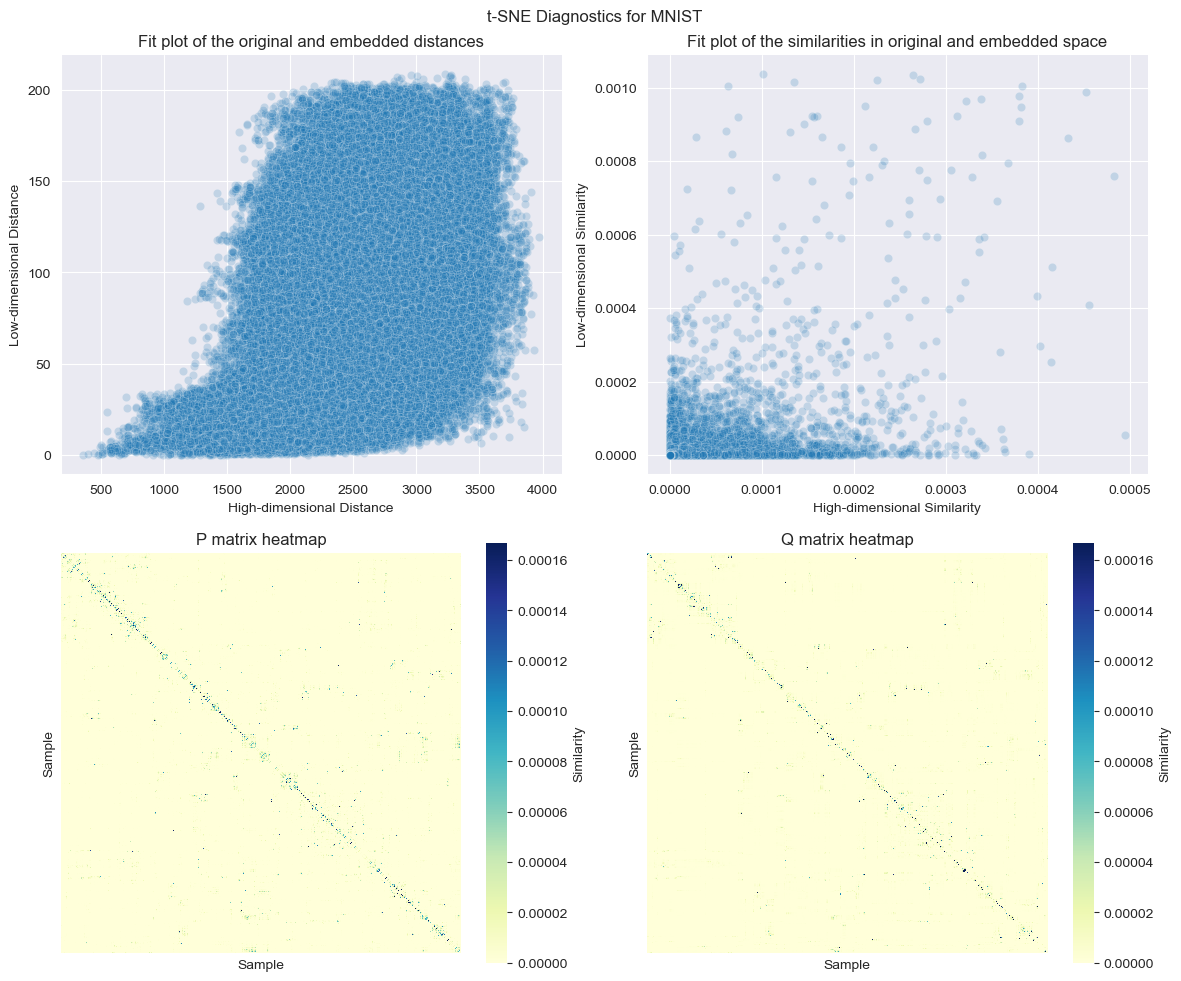

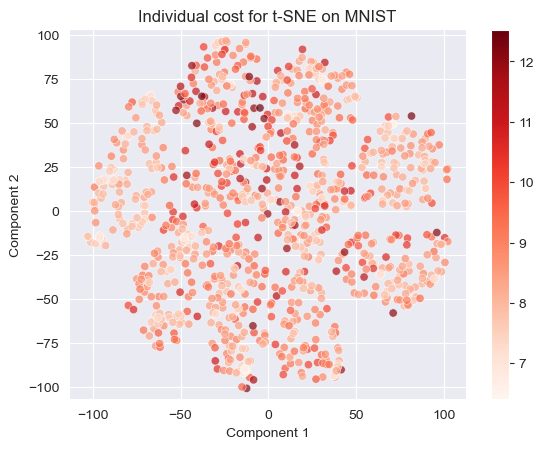

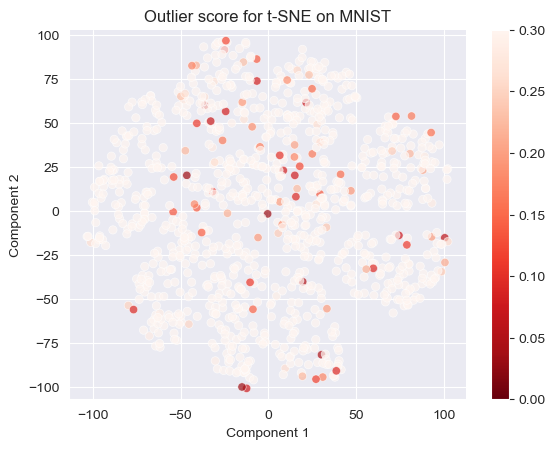

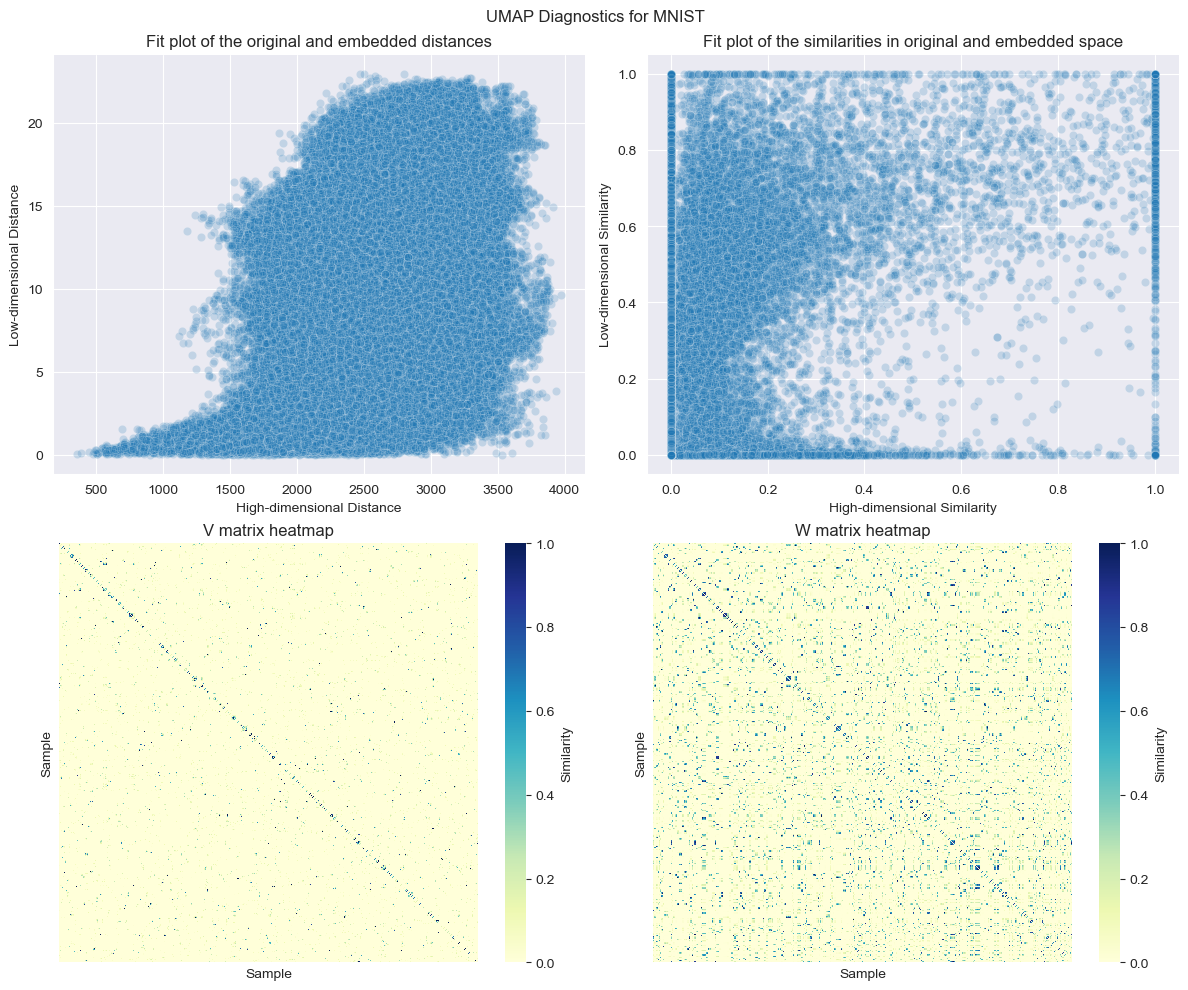

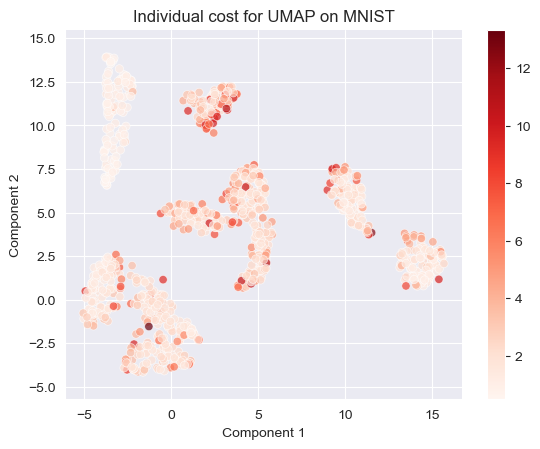

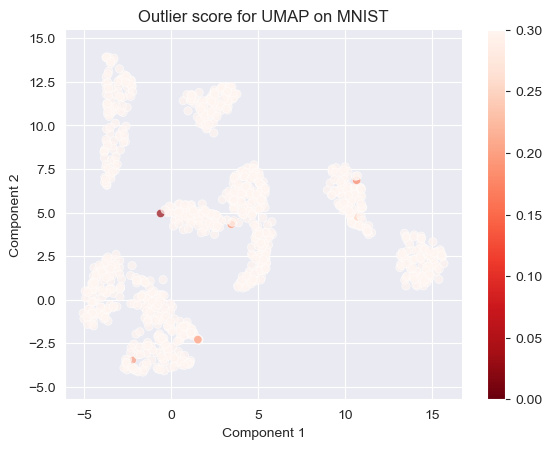

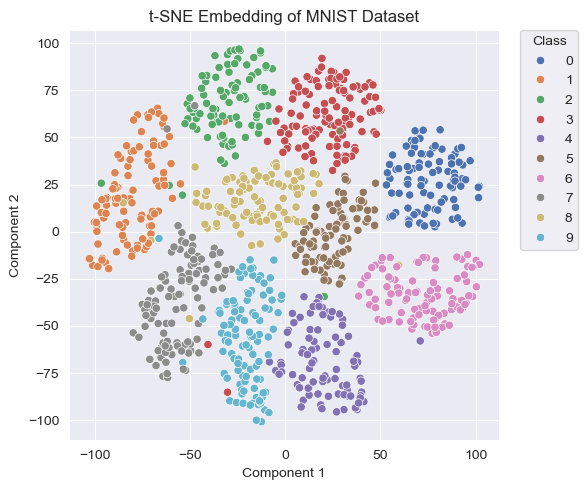

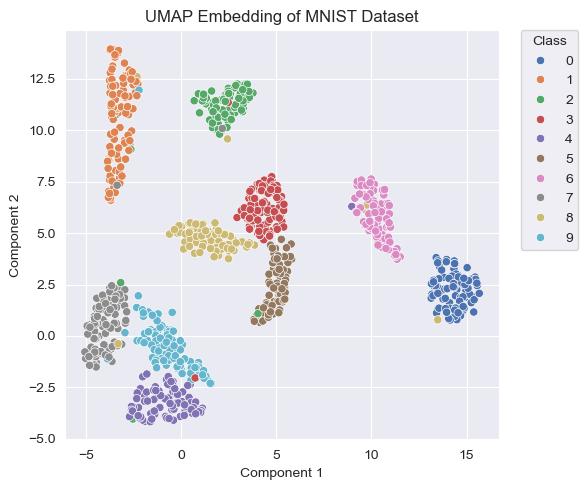

In [14]:
# t-SNE
fig = diagnostic_plots(X_original=X_subset, X_embedded=X_mnist_tsne_subset, method='tsne', perplexity=30, title='t-SNE Diagnostics for MNIST')
plt.savefig('tsne_diagnostics_mnist')
plt.show()

fig = plot_individual_cost(X_original=X_subset, X_embedded=X_mnist_tsne_subset, method='tsne', perplexity=30, title='Individual cost for t-SNE on MNIST')
plt.savefig('individual_cost_mnist_tsne')
plt.show()

fig = plot_outlier_score(X_original=X_subset, X_embedded=X_mnist_tsne_subset, method='tsne', perplexity=30, title='Outlier score for t-SNE on MNIST')
plt.savefig('outlier_score_mnist_tsne')
plt.show()

# UMAP
fig = diagnostic_plots(X_original=X_subset, X_embedded=X_mnist_umap_subset, method='umap', k_neighbours=30, title='UMAP Diagnostics for MNIST')
plt.savefig('umap_diagnostics_mnist')
plt.show()

fig = plot_individual_cost(X_original=X_subset, X_embedded=X_mnist_umap_subset, method='umap', k_neighbours=30, title='Individual cost for UMAP on MNIST')
plt.savefig('individual_cost_mnist_umap')
plt.show()

fig = plot_outlier_score(X_original=X_subset, X_embedded=X_mnist_umap_subset, method='umap', k_neighbours=30, title='Outlier score for UMAP on MNIST')
plt.savefig('outlier_score_mnist_umap')
plt.show()

# Embedding Visualisations
# Plot t-SNE embedding
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_mnist_tsne_subset[:, 0], y=X_mnist_tsne_subset[:, 1], hue=y_subset, palette='deep')
plt.title('t-SNE Embedding of MNIST Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0., title='Class')
plt.tight_layout()
plt.savefig("tsne_mnist")
plt.show()

# Plot UMAP embedding
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_mnist_umap_subset[:, 0], y=X_mnist_umap_subset[:, 1], hue=y_subset, palette='deep')
plt.title('UMAP Embedding of MNIST Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0., title='Class')
plt.tight_layout()
plt.savefig("umap_mnist")
plt.show()